# College Data Questions and Analysis


# Background

This is the first project for STAT 353, Statistical Methods I for Engineering. In this report, we ask questions about the provided data, compare them to AI questions, and pick ten questions to investigate ourselves.

# Task

We are tasked with asking two sets of ten questions. We must create the first set ourselves and the second set with AI. Then we must compare the sets of questions and choose ten to explore with the descriptive statistical methods we have learned so far.

# Data

The data used for this project comes from the US Department of Education and its [College Scorecard project](https://collegescorecard.ed.gov/data/). The original database captures a wide number of attributes for all colleges in the country that participated in Title IV. However, the dataset used in this project is a truncated version hosted at [lock5stat.com](https://www.lock5stat.com/datapage3e.html) with only four year schools and a smaller set of attributes. Specifically, the dataset contains 2012 entries and 37 attributes. The version used for this project was downloaded in 2019.

# Tools

To process and analyze data for this project, we use Google Collab to run Python notebook files. MatPlotLib, Pandas, and Numpy are also used for graphing, data manipulation, and mathematical computation. We chose these technologies due to previous experience with them in machine learning projects.

# Methodology

First, the data's attributes are observed and the first ten questions are created. Then the same information about the attributes is fed as a prompt to ChatGPT and its output is used as the second set of questions. Then the sets of questions are compared and observations are made. Next, five questions from each set are selected based on personal interest. These questions are then analyzed in the notebook file using a variety of statistical methods, including box plots, histograms, scatter plots, and correlation.

# Questions

## Our Questions

The following is a list of the questions we created to compare with ChatGPT’s questions:
1.	What state has the most universities?
2.	What is the average cost of tuition for each state?
3.	What proportion of schools have an average SAT score higher than 1350?
4.	What proportion of schools are above the center of the continental US (longitude 98.5795° W)?
5.	What is the average ratio of tuition to faculty salary?
6.	Are tuition and debt positively correlated?
7.	What is the average cost of university for each locale type?
8.	What proportion of colleges are available in rural areas?
9.	How common is each ethnicity for each locale type?
10.	What is the relationship between locale and the proportion of students that receive a Pell grant?


## AI Questions

The following is a list of questions generated by ChatGPT. The exact prompt used to generated these can be found in [Appendix A](https://colab.research.google.com/drive/1F74-3I2gh-gF3yNg8ciKV1B0uaKLOecn#scrollTo=JkUor_0VDAM7&line=1&uniqifier=1).
1.	How does the admission rate correlate with the median ACT and average SAT scores across different regions?
2.	What is the relationship between the percentage of first-generation students and the completion rate?
3.	How do in-state and out-of-state tuition fees vary by region and school control (public vs. private)?
4.	Is there a significant difference in the average debt of students between schools with higher vs. lower percentages of students receiving Pell grants?
5.	What are the patterns of racial/ethnic diversity (White, Black, Hispanic, Asian, Other) across different locales (City, Rural, Suburb, Town)?
6.	How does the percentage of female students correlate with the completion rate across various types of institutions?
7.	How does the proportion of full-time faculty relate to the completion rate and average net price?
8.	Are schools with higher average instructional spending per FTE student associated with higher completion rates?
9.	How does median family income of students vary across different regions and types of institutions?
10.	What trends exist in online-only programs and their distribution across states and regions?

## Chosen Questions

The following is a list of questions taken from the previous two sections. Half of the questions are from the first list, and the remaining half are from the second. Questions from the second list are indicated with (*).
1.	What is the average cost of tuition for each state?
2.	What is the average ratio of tuition to faculty salary?
3.	What is the average cost of university for each locale type?
4.	What is the relationship between locale and the proportion of students that receive a Pell grant?
5.	Are tuition and debt positively correlated?
6.	(*) What is the relationship between the percentage of first-generation students and the completion rate?
7.	(*) Are schools with higher average instructional spending per FTE student associated with higher completion rates?
8.	(*) How does median family income of students vary across different regions and types of institutions?
9.	(*) How does the proportion of full-time faculty relate to the completion rate and average net price?
10.	(*) How does the admission rate correlate with the median ACT and average SAT scores across different regions?


# Get the Data

Before we get the data, we must import all the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

The following code will look for the data file in a local directory and download a new copy if it doesn't exist on the system yet.

In [2]:
from pathlib import Path
import urllib.request

def load_housing_data():
    filepath = Path("datasets/CollegeScores4yr.csv")
    if not filepath.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://www.lock5stat.com/datasets3e/CollegeScores4yr.csv"
        urllib.request.urlretrieve(url, filepath)
    return pd.read_csv(Path("datasets/CollegeScores4yr.csv"))

default_dataset = load_housing_data()

Taking a look at the first few entries shows that the data was imported successfully!

In [3]:
default_dataset.head ()

,Name,State,ID,Main,Accred,MainDegree,HighDegree,Control,Region,Locale,...,TuitionFTE,InstructFTE,FacSalary,FullTimeFac,Pell,CompRate,Debt,Female,FirstGen,MedIncome
0,Alabama A & M University,AL,100654,1,Southern Association of Colleges and Schools C...,3,4,Public,Southeast,City,...,9227.0,7298.0,6983.0,71.3,71.0,23.96,1068.0,56.4,36.6,23.6
1,University of Alabama at Birmingham,AL,100663,1,Southern Association of Colleges and Schools C...,3,4,Public,Southeast,City,...,11612.0,17235.0,10640.0,89.9,35.3,52.92,3755.0,63.9,34.1,34.5
2,Amridge University,AL,100690,1,Southern Association of Colleges and Schools C...,3,4,Private,Southeast,City,...,14738.0,5265.0,3866.0,100.0,74.2,18.18,109.0,64.9,51.3,15.0
3,University of Alabama in Huntsville,AL,100706,1,Southern Association of Colleges and Schools C...,3,4,Public,Southeast,City,...,8727.0,9748.0,9391.0,64.6,27.7,48.62,1347.0,47.6,31.0,44.8
4,Alabama State University,AL,100724,1,Southern Association of Colleges and Schools C...,3,4,Public,Southeast,City,...,9003.0,7983.0,7399.0,54.2,73.8,27.69,1294.0,61.3,34.3,22.1


We can also look at a list of columns, which reveals that several columns have missing data. This makes sense since not all colleges (especially private ones) report all this data.

In [4]:
default_dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2012 entries, 0 to 2011
Data columns (total 37 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2012 non-null   object 
 1   State        2012 non-null   object 
 2   ID           2012 non-null   int64  
 3   Main         2012 non-null   int64  
 4   Accred       2008 non-null   object 
 5   MainDegree   2012 non-null   int64  
 6   HighDegree   2012 non-null   int64  
 7   Control      2012 non-null   object 
 8   Region       2012 non-null   object 
 9   Locale       2012 non-null   object 
 10  Latitude     2012 non-null   float64
 11  Longitude    2012 non-null   float64
 12  AdmitRate    1652 non-null   float64
 13  MidACT       1252 non-null   float64
 14  AvgSAT       1277 non-null   float64
 15  Online       2012 non-null   int64  
 16  Enrollment   2011 non-null   float64
 17  White        2011 non-null   float64
 18  Black        2011 non-null   float64
 19  Hispan

With the data loaded into memory, we are now ready to begin analysis.

# Analysis

## What is the average cost of tuition for each state?

There are two attributes relating to tuition (in and out-of-state tuition), so we calculate means for both of them by grouping the data by state. We also create a new column of data, which is the average of both in and out-of-state tuitions.

In [5]:
# Create columns for average in/out of state tuitions
average_tuition = default_dataset.groupby('State')[['TuitionIn', 'TuitonOut']].mean().reset_index()

# Create column for average tuition, using the average of each state's in/out of state tuitions
average_tuition['TotalAverageTuition'] = (average_tuition['TuitionIn'] + average_tuition['TuitonOut']) / 2

In [6]:
average_tuition.head ()

,State,TuitionIn,TuitonOut,TotalAverageTuition
0,AK,9978.000000,17664.000000,13821.000000
1,AL,14788.100000,19225.666667,17006.883333
2,AR,15505.571429,18580.142857,17042.857143
3,AZ,16641.647059,23013.117647,19827.382353
4,CA,25200.112782,29150.233083,27175.172932


The following graph shows the average in-state and out-of-state tuitions for each state. As expected, the mean out-of-state tuition is much higher. It is also clear that there are some states with much higher tuition than others, however, this graph makes it difficult to see.

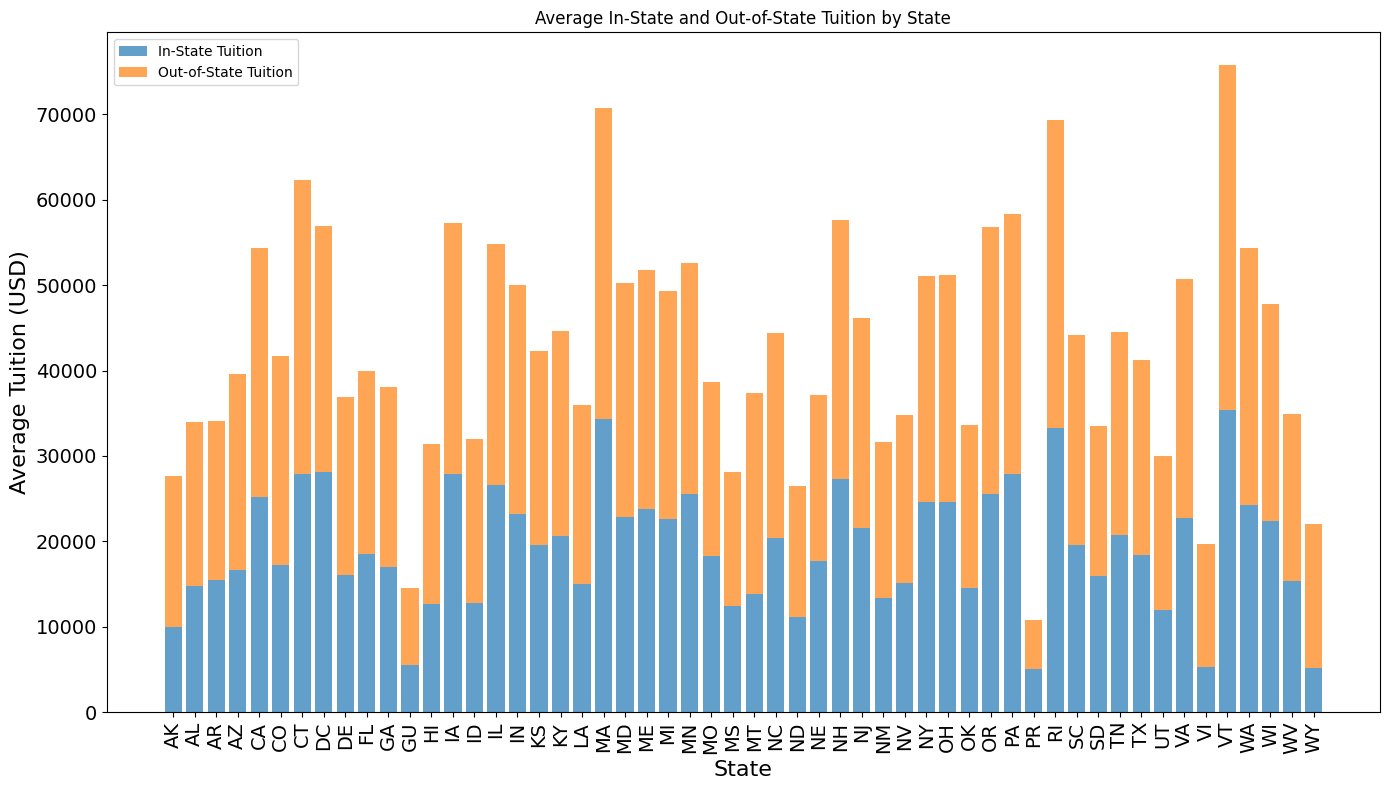

In [7]:
plt.figure(figsize=(14, 8))
plt.bar(average_tuition['State'], average_tuition['TuitionIn'], label='In-State Tuition', alpha=0.7)
plt.bar(average_tuition['State'], average_tuition['TuitonOut'], label='Out-of-State Tuition', alpha=0.7, bottom=average_tuition['TuitionIn'])

plt.xlabel('State', fontsize=16)
plt.ylabel('Average Tuition (USD)', fontsize=16)
plt.title('Average In-State and Out-of-State Tuition by State')
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.legend()
plt.tight_layout()

plt.show()

The following graph shows the total average tuition for each state, sorted by highest price first. States such as Vermont, Massachusetts, Rhode Island, and Connecticut are significantly more expensive than the rest. The two lowest states are actually the US territories of Guam and Puerto Rico.

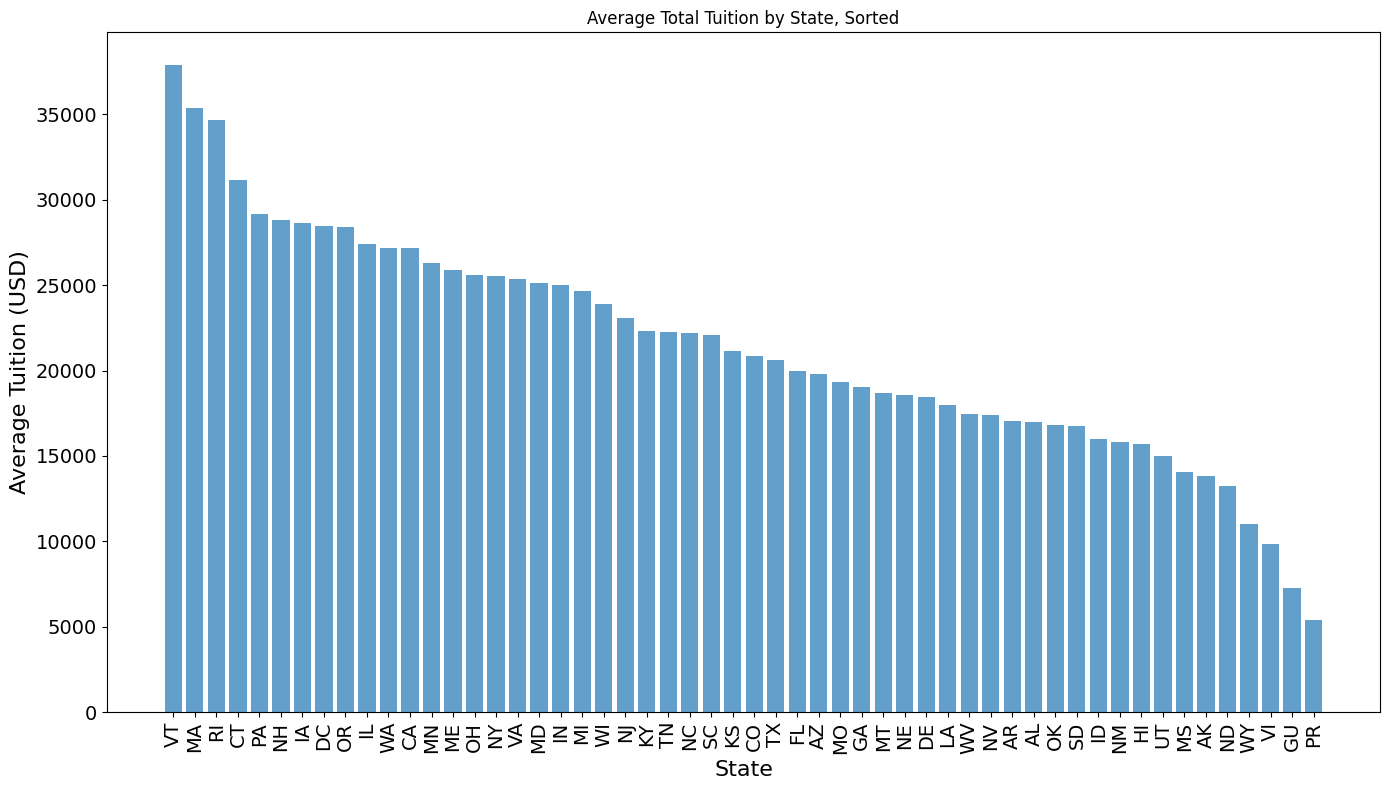

In [8]:
# Sort total average tuition
total_average_tuition = average_tuition.sort_values('TotalAverageTuition', ascending=False)

plt.figure(figsize=(14, 8))
plt.bar(total_average_tuition['State'], total_average_tuition['TotalAverageTuition'], alpha=0.7)

plt.xlabel('State', fontsize=16)
plt.ylabel('Average Tuition (USD)', fontsize=16)
plt.title('Average Total Tuition by State, Sorted')
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)
plt.tight_layout()

plt.show()

The out-of-state box plot is higher compared to the in-state tuition box plot, which reaffirms our observation that out-of-state tuition is more expensive than in-state tuition, on average. The top whisker of the out-of-state plot is also slightly longer, indicating that a handful of schools charge much higher than average for out-of-state tuition. Finally, the IQR for the in-state tuition plot is slightly larger, indicating greater variance in in-state tuition prices.

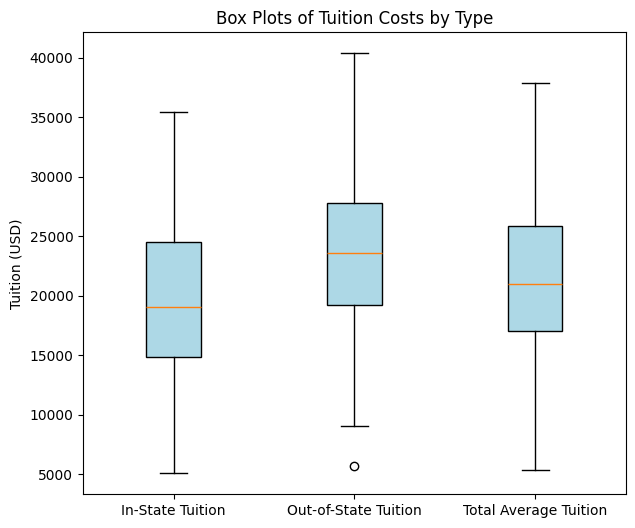

In [9]:
tuition_data = [
    average_tuition['TuitionIn'],
    average_tuition['TuitonOut'],
    average_tuition['TotalAverageTuition']
]

plt.figure(figsize=(7, 6))
plt.boxplot(tuition_data, labels=['In-State Tuition', 'Out-of-State Tuition', 'Total Average Tuition'], patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.ylabel('Tuition (USD)')
plt.title('Box Plots of Tuition Costs by Type')

plt.show()

## What is the average ratio of tuition to faculty salary?

The following code calculates the ratio of total average tuition to yearly faculty salary. However, faculty salary is represented monthly in the data, so it needs to be scaled by 12 to match the tuition.

In [10]:
average_tuition = ((default_dataset['TuitionIn'] + default_dataset['TuitonOut']) / 2)
tuition_salary_ratio = (default_dataset['FacSalary'] * 12) / average_tuition
print (f"The total average ratio of average tuition to faculty salary is: {tuition_salary_ratio.dropna().mean():.2f}")

The total average ratio of average tuition to faculty salary is: 4.87


The total average is a little under five, indicating that on average, it takes about five student's yearly tuition payments to support one professor's salary. The total average is a little under five, indicating that on average, it takes about five student's yearly tuition payments to support one professor's salary.

The following box plot shows that there are many outliers on the top end of the spectrum. Either a few professors get paid extremely well, or they work for a university with unusually cheap tuition. However, this graph does a poor job of showing most of the box plot.

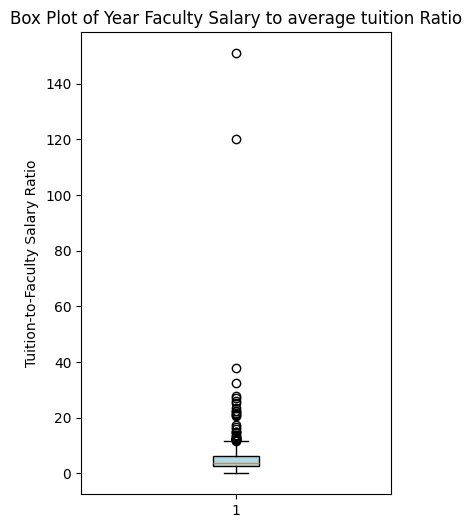

In [11]:
plt.figure(figsize=(4, 6))
# Some values must be dropped since faculty salary is not defined for all entries
plt.boxplot(tuition_salary_ratio.dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.ylabel('Tuition-to-Faculty Salary Ratio')
plt.title('Box Plot of Year Faculty Salary to average tuition Ratio')

plt.show()

The next box plot limits the y-axis to a more useful range. The longer top whisker and number of outliers indicate that there is a great amount of variability at high ratios. These colleges may have low tuition relative to faculty costs. This could be due to the cost of needed equipment and training or the tuition may be subsidized. Alternatively, it may also be due to private/for-profit schools that offer higher than standard salaries to their faculty. The plot indicates that the data is skewed right, meaning that most colleges have reasonable ratios and a small amount have exceedingly high ratios.

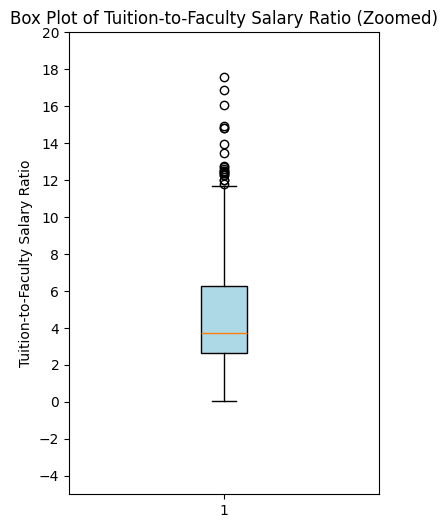

In [12]:
# Plot the box plot with limited range
plt.figure(figsize=(4, 6))
plt.boxplot(tuition_salary_ratio.dropna(), patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Limit the y-axis to focus on the main box plot
plt.ylim(-5, 20)
plt.locator_params(axis='y', nbins=15)

plt.ylabel('Tuition-to-Faculty Salary Ratio')
plt.title('Box Plot of Tuition-to-Faculty Salary Ratio (Zoomed)')

# Display the plot
plt.show()

The following three graphs help elaborate on our previous points. The first graph shows the relationship between salary and tuition. There appears to be a relationship, although a large number of values split off near the bottom of the graph. It seems like there are many schools where tuition is kept low, despite having higher salaries (indicated by the lower mass of the graph). The upper mass of the map suggests that many colleges instead increase tuition dramatically to compensate for higher salaries.

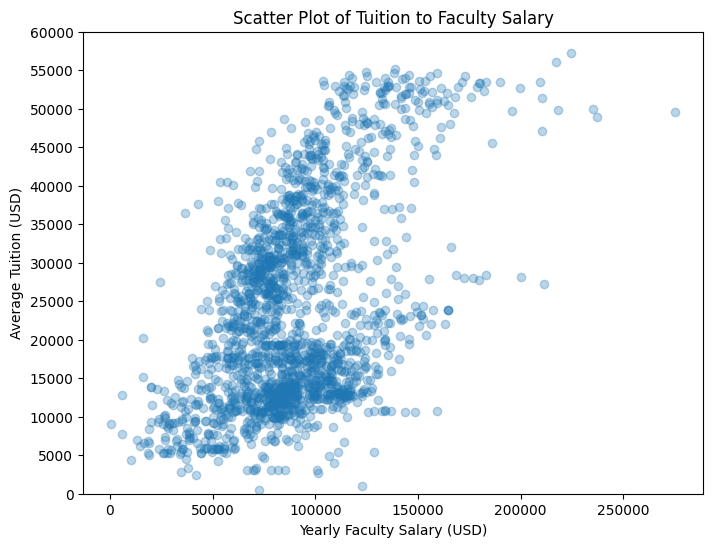

In [13]:
plt.figure(figsize=(8, 6))

plt.scatter((default_dataset['FacSalary'] * 12), average_tuition, alpha=0.3)
plt.xlabel('Yearly Faculty Salary (USD)')
plt.ylabel('Average Tuition (USD)')
plt.title('Scatter Plot of Tuition to Faculty Salary')
plt.locator_params(axis='y', nbins=15)
plt.ylim(0, 60000)

# Display the plot
plt.show()

The next graph corroborates these ideas. It also appears to split in two. The bottom mass indicates that increasing salary for some colleges doesn't affect the ratio much. These are likely the schools that increase tuition to compensate for the salaries and keep the ratio low. The upper mass shows the opposite: schools that avoid raising tuition despite increased salaries.

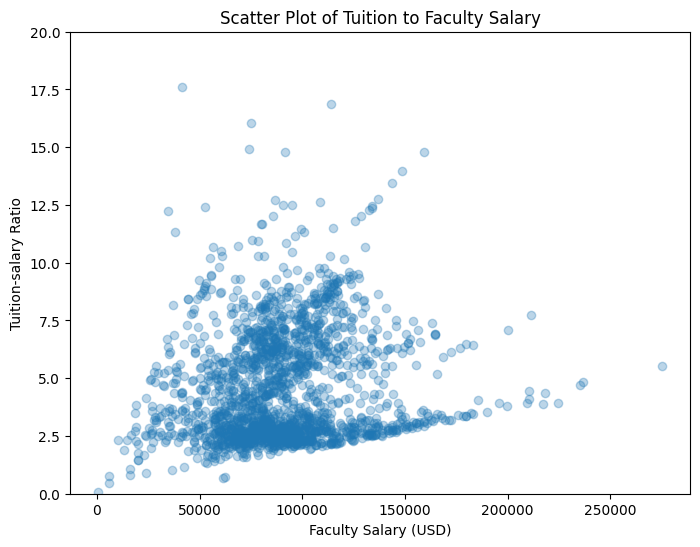

In [14]:
plt.figure(figsize=(8, 6))

plt.scatter((default_dataset['FacSalary'] * 12), tuition_salary_ratio, alpha=0.3)
plt.xlabel('Faculty Salary (USD)')
plt.ylabel('Tuition-salary Ratio')
plt.title('Scatter Plot of Tuition to Faculty Salary')
plt.ylim(0, 20)

# Display the plot
plt.show()

The final graph appears to show an inverse relationship between the ratio and average tuition where increasing tuition decreases the ratio. It suggests that schools charging more per student can afford to pay faculty well without needing as much tuition income per faculty salary.

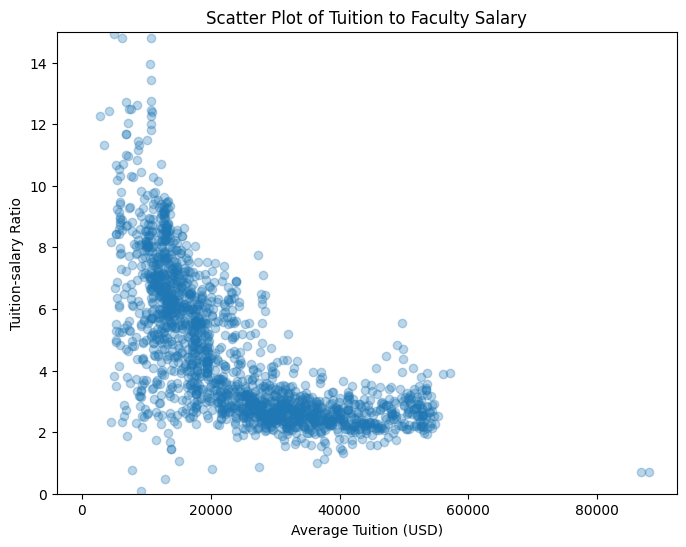

In [15]:
plt.figure(figsize=(8, 6))

plt.scatter(average_tuition, tuition_salary_ratio, alpha=0.3)
plt.xlabel('Average Tuition (USD)')
plt.ylabel('Tuition-salary Ratio')
plt.title('Scatter Plot of Tuition to Faculty Salary')
plt.ylim(0, 15)

# Display the plot
plt.show()

## What is the average cost of university for each locale type?

Calculating the means for each locale is straightforward. We simply group the rows by locale and find the means of their costs. The locale refers to what type of area the college is located in, ranging from rural to city. Cost is simply the average cost for tuition, room, board, and anything else a student would pay for.

In [16]:
average_cost_locale = default_dataset.groupby('Locale')['Cost'].mean()
average_cost_locale = average_cost_locale.reindex(['Rural', 'Town', 'Suburb', 'City'])

The following bar graph shows the average cost for each locale. Suburbs have the highest average cost, with cities in second. Rural and town areas are the lowest and have similar costs.

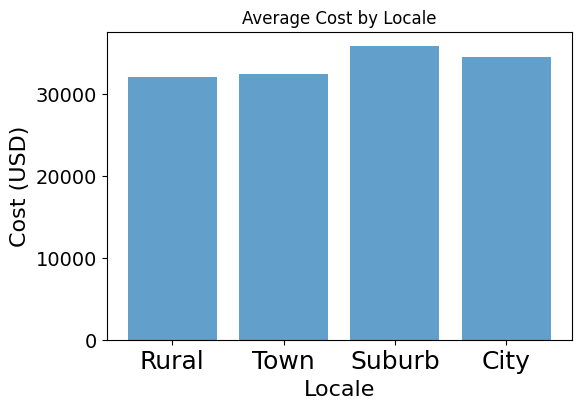

In [17]:
plt.figure(figsize=(6, 4))
plt.bar(average_cost_locale.index, average_cost_locale.values, alpha=0.7)

plt.xlabel('Locale', fontsize=16)
plt.ylabel('Cost (USD)', fontsize=16)
plt.title('Average Cost by Locale')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=18)

plt.show()

The following box plots clarify some details. Rural schools show the least variance, the lowest maximum cost, and the highest minimum cost. This suggests that rural schools have a smaller range of price options. This may be due to lower operating costs or less demand than other colleges. However, there seems to be a lack of very low-cost options, meaning that lower prices can only be found in other locales.

Cities contain both the lowest and highest costs. This is likely due to the greater number of colleges in cities compared to the other locales, especially since the data only contains four-year colleges. This provides students with more opportunities to find four-year schools within their budget compared to the other locales.

All the plots have longer top whiskers, indicating that they each have a right skew. Practically, this means that most colleges tend to cluster within a low range of costs, while some have significantly higher costs. This may be from premium or specialized schools with higher than normal tuition costs.

<Figure size 800x500 with 0 Axes>

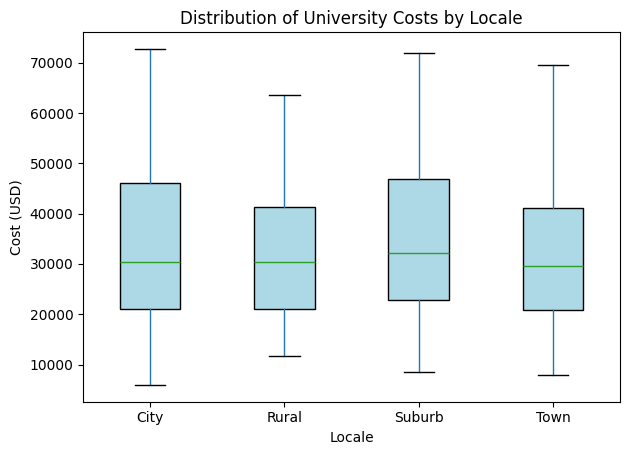

In [18]:
plt.figure(figsize=(8, 5))
default_dataset.boxplot(column='Cost', by='Locale', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Distribution of University Costs by Locale')
plt.suptitle('')  # Removes the default 'Boxplot grouped by Locale' title
plt.xlabel('Locale')
plt.ylabel('Cost (USD)')
plt.tight_layout()

plt.show()

## What is the relationship between locale and the proportion of students that receive a Pell grant?

Once again, we must group the data by locale and calculate the means of their Pell Grant proportions.

In [19]:
pell_by_locale = default_dataset.groupby('Locale')['Pell'].mean()
pell_by_locale = pell_by_locale.reindex(['Rural', 'Town', 'Suburb', 'City'])

The following graph makes it clear that rural areas give the highest proportion of students Pell Grants. It is followed distantly by cities, suburbs, and towns. It suggests that there are more low-income students in rural areas compared to other locales. One reason for this may be the lack of job opportunities in rural areas. With cities being the second highest, it breaks the expectation that the proportion may have been based on population size. Instead, it suggests that cities have a greater income diversity than the other locales.

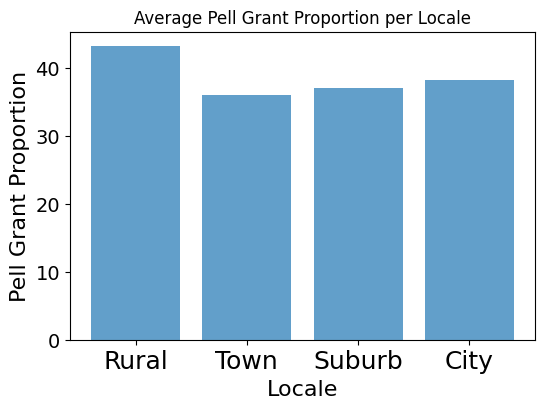

In [20]:
plt.figure(figsize=(6, 4))
plt.bar(pell_by_locale.index, pell_by_locale.values, alpha=0.7)

plt.xlabel('Locale', fontsize=16)
plt.ylabel('Pell Grant Proportion', fontsize=16)
plt.title('Average Pell Grant Proportion per Locale')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=18)

plt.show()

The next graph shows a set of box plots, one for each locale. Rural areas have the highest minimum proportion, with except for a single outlier. It also has a smaller range than the other plots and fewer outliers. This suggests that rural students have a more homogenous economic background. The other locales have more colleges with proportions closer to zero but also show a greater range of values compared to rural areas, reiterating that they have greater income diversity.

<Figure size 800x500 with 0 Axes>

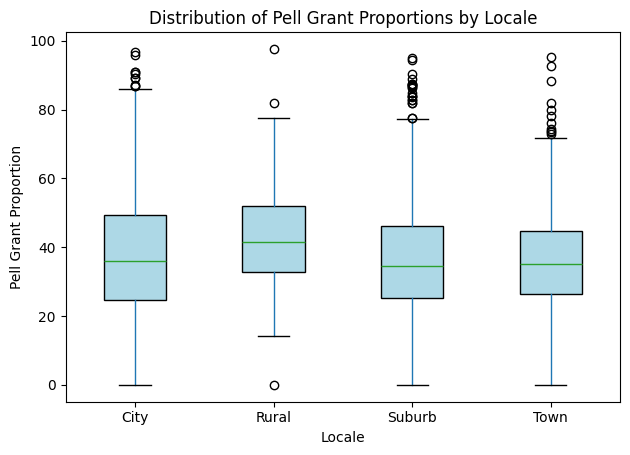

In [21]:
plt.figure(figsize=(8, 5))
default_dataset.boxplot(column='Pell', by='Locale', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Distribution of Pell Grant Proportions by Locale')
plt.suptitle('')  # Removes the default 'Boxplot grouped by Locale' title
plt.xlabel('Locale')
plt.ylabel('Pell Grant Proportion')
plt.tight_layout()

plt.show()

## Are tuition and debt positively correlated?

Now we will calculate the correlation between debt and each type of tuition (in-state, out-of-state, and average).

In [22]:
average_tuition = ((default_dataset['TuitionIn'] + default_dataset['TuitonOut']) / 2)

correlation_in_state = default_dataset['TuitionIn'].corr(default_dataset['Debt'])
correlation_outof_state = default_dataset['TuitonOut'].corr(default_dataset['Debt'])
correlation_overall = average_tuition.corr(default_dataset['Debt'])

print(f'Correlation between In-State Tuition and Debt: {correlation_in_state:0.2f}')
print(f'Correlation between Out-of-State Tuition and Debt: {correlation_outof_state:0.2f}')
print(f'Correlation between Average Tuition and Debt: {correlation_overall:0.2f}')

Correlation between In-State Tuition and Debt: -0.23
Correlation between Out-of-State Tuition and Debt: -0.18
Correlation between Average Tuition and Debt: -0.21


All three sets of tuition seem to have weak negative correlations with debt. This may be because debt is only one of many attributes that contribute to debt. Out-of-state tuition also has the weakest relationship, suggesting that out-of-state students are marginally less likely to accrue debt and may experience different financial circumstances.

The following graphs show each type of tuition plotted against debt. They also each include a line of best fit to better demonstrate their relationship. The in-state tuition graph shows a pattern where tuition values in the left-middle portion of the graph are associated with greater debt. This could indicate that low to mid-range tuition is expensive enough to make students accrue debt but not expensive enough to have comprehensive financial aid. The out-of-state tuition graph shows a similar pattern, but the mass of tuition costs with high debt seems to be spread out farther and closer to the center of the graph. This suggests that massive debt for out-of-state students is associated with a greater range of tuition costs. Out-of-state students generally pay more for tuition, which places additional strain on their financial circumstances. This may also indicate that out-of-state students receive less financial support.

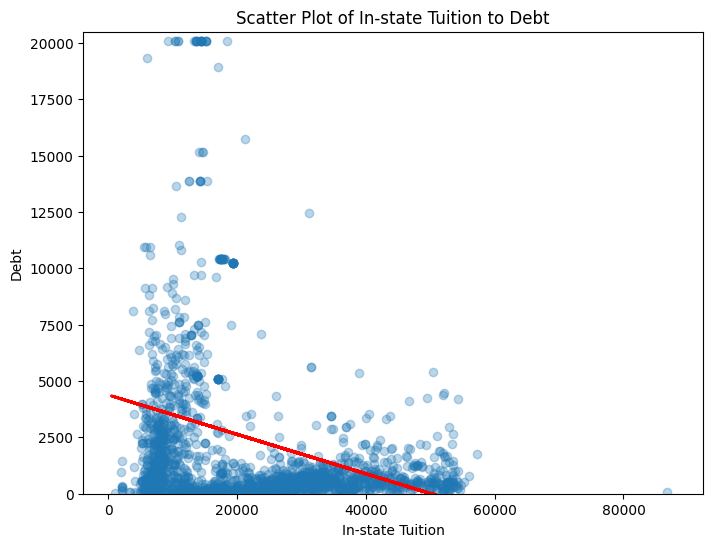

In [23]:
plt.figure(figsize=(8, 6))

plt.scatter(default_dataset['TuitionIn'], default_dataset['Debt'], label='In-state Tuition', alpha=0.3)

# Line of best fit
filtered_data = default_dataset[['TuitionIn', 'Debt']].dropna()
slope, intercept = np.polyfit(filtered_data['TuitionIn'], filtered_data['Debt'], 1)
best_fit_line = slope * default_dataset['TuitionIn'] + intercept
plt.plot(default_dataset['TuitionIn'], best_fit_line, color='red', label='Line of Best Fit', linewidth=2)

plt.xlabel('In-state Tuition')
plt.ylabel('Debt')
plt.title('Scatter Plot of In-state Tuition to Debt')
plt.ylim(0, 20500)

# Display the plot
plt.show()

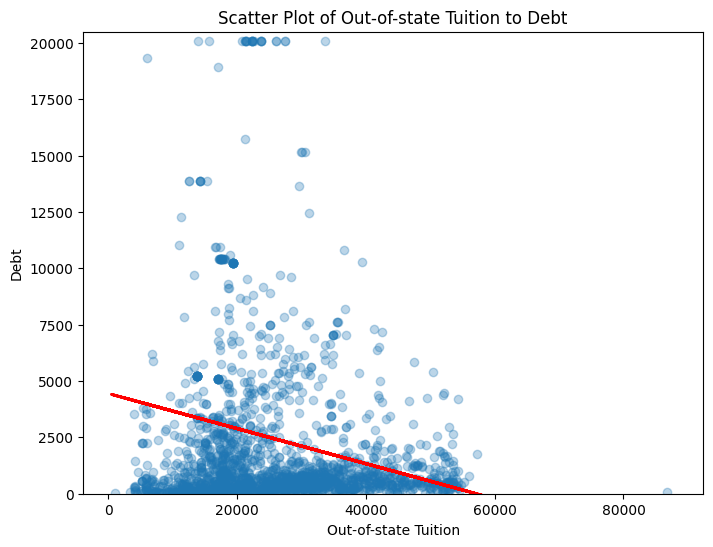

In [24]:
plt.figure(figsize=(8, 6))

plt.scatter(default_dataset['TuitonOut'], default_dataset['Debt'], label='Out-of-state Tuition', alpha=0.3)

# Line of best fit
filtered_data = default_dataset[['TuitonOut', 'Debt']].dropna()
slope, intercept = np.polyfit(filtered_data['TuitonOut'], filtered_data['Debt'], 1)
best_fit_line = slope * default_dataset['TuitonOut'] + intercept
plt.plot(default_dataset['TuitonOut'], best_fit_line, color='red', label='Line of Best Fit', linewidth=2)

plt.xlabel('Out-of-state Tuition')
plt.ylabel('Debt')
plt.title('Scatter Plot of Out-of-state Tuition to Debt')
plt.ylim(0, 20500)

# Display the plot
plt.show()

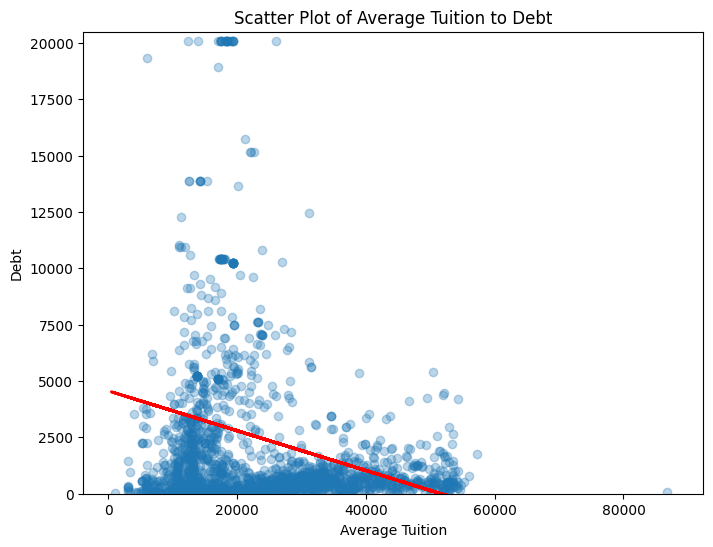

In [25]:
plt.figure(figsize=(8, 6))

plt.scatter(average_tuition, default_dataset['Debt'], label='Average Tuition', alpha=0.3)

# Line of best fit
filtered_data = pd.DataFrame({
    'AverageTuition': average_tuition,
    'Debt': default_dataset['Debt']
})
filtered_data = filtered_data[['AverageTuition', 'Debt']].dropna()
slope, intercept = np.polyfit(filtered_data['AverageTuition'], filtered_data['Debt'], 1)
best_fit_line = slope * default_dataset['TuitonOut'] + intercept
plt.plot(default_dataset['TuitonOut'], best_fit_line, color='red', label='Line of Best Fit', linewidth=2)

plt.xlabel('Average Tuition')
plt.ylabel('Debt')
plt.title('Scatter Plot of Average Tuition to Debt')
plt.ylim(0, 20500)

# Display the plot
plt.show()

## What is the relationship between the percentage of first-generation students and the completion rate?

Now we will calculate the correlation between the proportion of first-generation students and completion rate.

In [26]:
correlation_1gen_cr = default_dataset['FirstGen'].corr(default_dataset['CompRate'])

print(f'Correlation between the Proportion of First Gen Students and Completion Rate: {correlation_in_state:0.2f}')

Correlation between the Proportion of First Gen Students and Completion Rate: -0.23


They appear to have a weak negative correlation, which may indicate that first-generation students are slightly less likely to finish their degrees. Like with tuition and debt, the weak relationship suggests that the proportion of first-generation students is not a strong indicator of completion rate and that other factors influence the completion rate more significantly.

The following is a graph of the proportion of first-generation students against the completion rate. The graph demonstrates a linear trend, which supports the claim that the correlation is relatively consistent across the range of values.

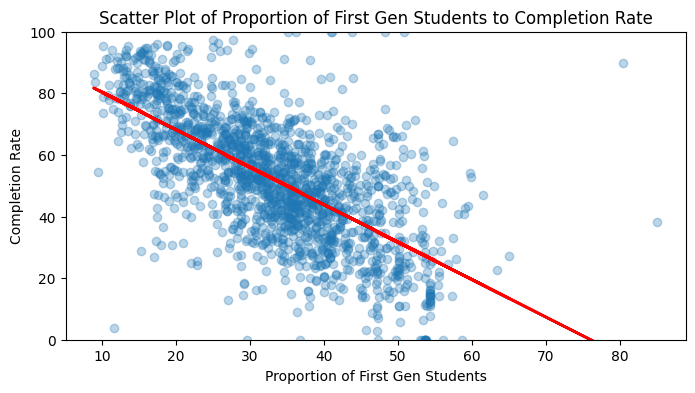

In [27]:
plt.figure(figsize=(8, 4))

plt.scatter(default_dataset['FirstGen'], default_dataset['CompRate'], alpha=0.3)

# Plot the line of best fit
filtered_data = default_dataset[['FirstGen', 'CompRate']].dropna()
slope, intercept = np.polyfit(filtered_data['FirstGen'], filtered_data['CompRate'], 1)
best_fit_line = slope * default_dataset['FirstGen'] + intercept
plt.plot(default_dataset['FirstGen'], best_fit_line, color='red', label='Line of Best Fit', linewidth=2)

plt.xlabel('Proportion of First Gen Students')
plt.ylabel('Completion Rate')
plt.title('Scatter Plot of Proportion of First Gen Students to Completion Rate')
plt.ylim(0, 100)

# Display the plot
plt.show()

## Are schools with higher average instructional spending per FTE student associated with higher completion rates?

Now we will calculate the correlation between average instructional spending per full-time equivalent (FTE) student and completion rate.

In [28]:
correlation_inspend_cr = default_dataset['InstructFTE'].corr(default_dataset['CompRate'])

print(f'Correlation between the Instructional Spending and Completion Rate: {correlation_inspend_cr:0.2f}')

Correlation between the Instructional Spending and Completion Rate: 0.49


Unlike the proportion of first-generation students, instructional spending has a much greater correlation with completion rate. It shows a moderate positive correlation, suggesting that as instructional spending increases, completion rates tend to increase as well. Even still, the correlation is not 1-1, which suggests other factors may influence the completion rate as well.

The following is a scatter plot of instructional spending against completion rate. The graph resembles an upward curve. Most of the instructional spending appears to be within 2500 to 15000 USD, after which points grow less dense as instructional spending increases. The graph seems to contradict the claim that their relationship is linear. The graph also provides evidence that increased instructional spending can improve completion rates, but with diminishing returns. For higher-spending institutions, their focus might need to shift to optimizing spending or targeting specific support areas rather than just increasing instructional spending.

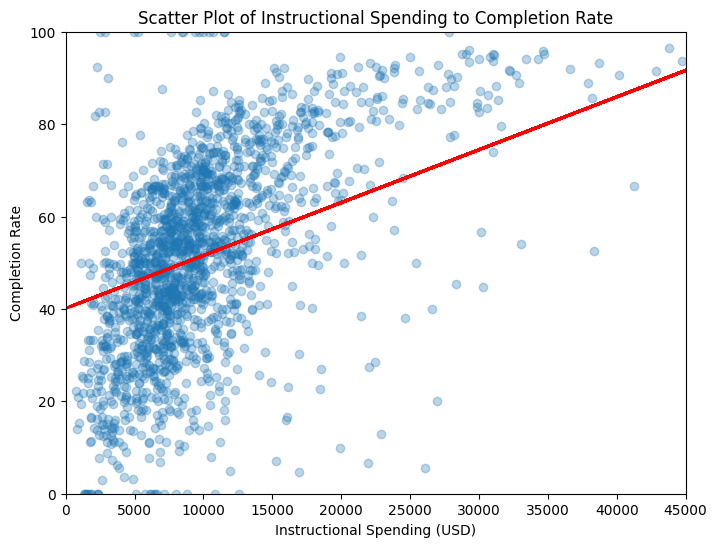

In [29]:
plt.figure(figsize=(8, 6))

plt.scatter(default_dataset['InstructFTE'], default_dataset['CompRate'], alpha=0.3)

# Plot the line of best fit
filtered_data = default_dataset[['InstructFTE', 'CompRate']].dropna()
slope, intercept = np.polyfit(filtered_data['InstructFTE'], filtered_data['CompRate'], 1)
best_fit_line = slope * default_dataset['InstructFTE'] + intercept
plt.plot(default_dataset['InstructFTE'], best_fit_line, color='red', label='Line of Best Fit', linewidth=2)

plt.xlabel('Instructional Spending (USD)')
plt.ylabel('Completion Rate')
plt.title('Scatter Plot of Instructional Spending to Completion Rate')
plt.xlim(0, 45000)
plt.ylim(0, 100)

# Display the plot
plt.show()

## How does median family income of students vary across different regions and types of institutions?

Now we will see how the median family income differs across each region and institution control type. First, we will group the data by region and calculate the means of the median income values. The generated graph reveals that the mean family income is greatest in the northeast region, followed closely by the midwest. This could mean a greater ability for students in these regions to cover educational costs, possibly reducing the need for loans or financial aid. Richer families may also be able to send their children to better schools that can help them prepare for college. The territories claim the lowest mean, significantly below the other regions. It suggests that students in this region may face greater financial barriers to college.

In [30]:
median_income_regions = default_dataset.groupby('Region')['MedIncome'].mean().reindex(['West','Midwest','Northeast','Southeast','Territory'])

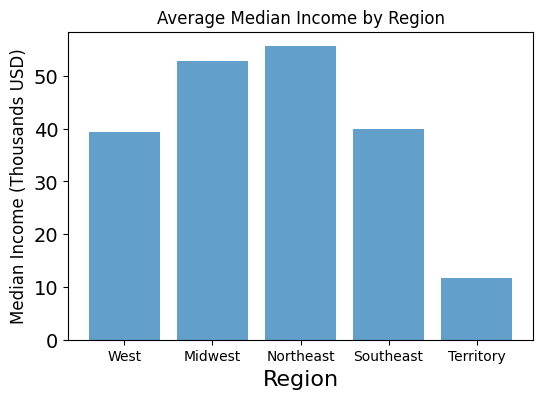

In [31]:
plt.figure(figsize=(6, 4))
plt.bar(median_income_regions.index, median_income_regions.values, alpha=0.7)

plt.xlabel('Region', fontsize=16)
plt.ylabel('Median Income (Thousands USD)', fontsize=12)
plt.title('Average Median Income by Region')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=10)

plt.show()

The following box plots show the distributions for each region. The Northeast has the highest maximum median income, followed again by the Midwest region. Both also have a wider range of values compared to the other regions, which may require more diverse financial aid support for students in these areas. The West and Southeast regions have a great number of outliers above their plots, suggesting that they have large pockets of high-income families despite having lower median incomes overall. All the plots also have similar minimum median incomes, suggesting that regional distinctions are less important among lower-income families. The territories have the lowest maximum median income and much less variance than the other regions. This implies that the region has less economic diversity and fewer chances to accumulate wealth, which could pose a barrier to college.

<Figure size 800x500 with 0 Axes>

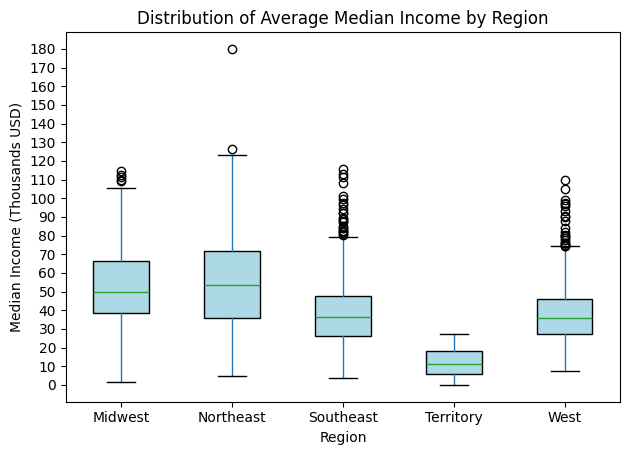

In [32]:
plt.figure(figsize=(8, 5))
default_dataset.boxplot(column='MedIncome', by='Region', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Distribution of Average Median Income by Region')
plt.suptitle('')  # Removes the default 'Boxplot grouped by Locale' title
plt.xlabel('Region')
plt.ylabel('Median Income (Thousands USD)')
plt.tight_layout()
plt.locator_params(axis='y', nbins=30)

plt.show()

Next, we repeat the process for the institution control type. The following bar graph shows that private schools have the highest median income, followed closely by public schools and distantly by for-profit schools.

In [33]:
median_income_controls = default_dataset.groupby('Control')['MedIncome'].mean().reindex(['Public','Private','Profit'])

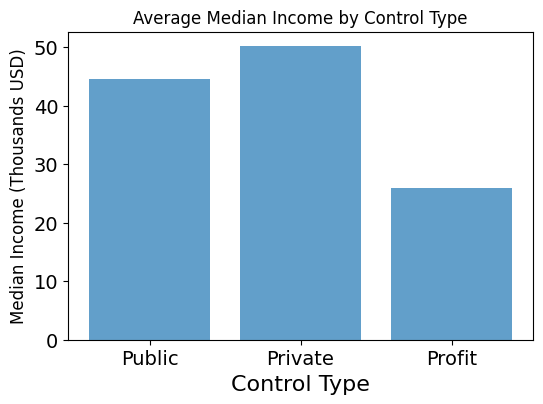

In [34]:
plt.figure(figsize=(6, 4))
plt.bar(median_income_controls.index, median_income_controls.values, alpha=0.7)

plt.xlabel('Control Type', fontsize=16)
plt.ylabel('Median Income (Thousands USD)', fontsize=12)
plt.title('Average Median Income by Control Type')
plt.tick_params(axis='y', labelsize=14)
plt.tick_params(axis='x', labelsize=14)

plt.show()

The following box plots reveal nuanced details about these mean values. Private schools have the largest range of values and IQR. Public schools are similar, with a slightly smaller IQR and a lower maximum median income. This suggests that private and public schools serve a diverse range of economic backgrounds, but private schools attract more wealthy families. The for-profit schools have the smallest range and IQR by far, in addition to a higher minimum median income and a much, much lower maximum median income. It seems that very poor and very rich families rarely choose for-profit schools. For-profit schools also support a more narrow range of students compared to public or private colleges. Its plot is also somewhat right-skewed, suggesting they support a higher concentration of lower-income students.

<Figure size 800x500 with 0 Axes>

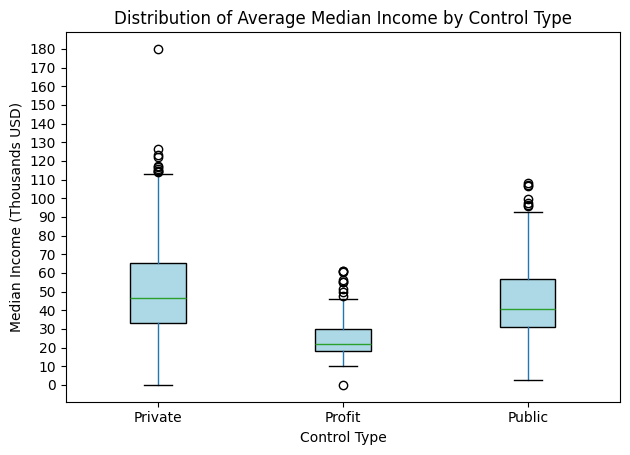

In [35]:
plt.figure(figsize=(8, 5))
default_dataset.boxplot(column='MedIncome', by='Control', grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))

plt.title('Distribution of Average Median Income by Control Type')
plt.suptitle('')  # Removes the default 'Boxplot grouped by Locale' title
plt.xlabel('Control Type')
plt.ylabel('Median Income (Thousands USD)')
plt.tight_layout()
plt.locator_params(axis='y', nbins=30)

plt.show()

## How does the proportion of full-time faculty relate to the completion rate and average net price?

Now we calculate the correlation between full-time faculty and completion rate/net price.

In [36]:
corr_fulltime_cr = default_dataset['FullTimeFac'].corr(default_dataset['CompRate'])
corr_fulltime_avgnetprice = default_dataset['FullTimeFac'].corr(default_dataset['NetPrice'])

print(f'Correlation between Proportion of Full-time Faculty and Completion Rate: {corr_fulltime_cr:0.2f}')
print(f'Correlation between Proportion of Full-time Faculty and Net Price (USD): {corr_fulltime_avgnetprice:0.2f}')

Correlation between Proportion of Full-time Faculty and Completion Rate: 0.25
Correlation between Proportion of Full-time Faculty and Net Price (USD): -0.10


The results suggest a weak positive correlation for completion rate and an extremely weak negative correlation for net price. As the number of full-time faculty increases, the completion rate generally increases and the net price generally decreases slightly. This suggests that increasing staff may have a positive effect on the completion rate, but other factors need to be adjusted to improve it further. As for net price, the low correlation suggests it may have an effect on the completion rate, albeit a subtle one.

The following graph depicts the proportion of full-time faculty against the completion rate. There appears to be a large concentration of data points on the right side of the graph, indicating that many colleges have a full force of full-time staff. Overall, the graph shows a subtle positive trend. Nevertheless, the data points at each proportion vary wildly, providing evidence that the proportion of full-time faculty may only be one factor among many that affect the completion rate. The cluster of points at the proportion of 100% also varies wildly. This suggests that there may be some advantage to having only full-time staff, but it does not guarantee a high completion rate.

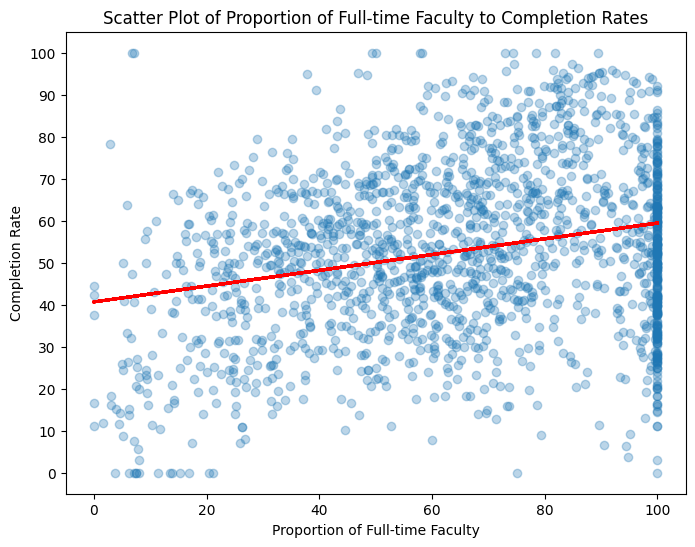

In [37]:
plt.figure(figsize=(8, 6))

plt.scatter(default_dataset['FullTimeFac'], default_dataset['CompRate'], alpha=0.3)

# Line of best fit
filtered_data = default_dataset[['FullTimeFac', 'CompRate']].dropna()
slope, intercept = np.polyfit(filtered_data['FullTimeFac'], filtered_data['CompRate'], 1)
best_fit_line = slope * default_dataset['FullTimeFac'] + intercept
plt.plot(default_dataset['FullTimeFac'], best_fit_line, color='red', label='Line of Best Fit', linewidth=2)

plt.xlabel('Proportion of Full-time Faculty')
plt.ylabel('Completion Rate')
plt.title('Scatter Plot of Proportion of Full-time Faculty to Completion Rates')
plt.locator_params(axis='y', nbins=20)

# Display the plot
plt.show()

The following graph depicts the proportion of full-time faculty against the net price. The graph appears relatively flat, and the line of best fit reflects this. Like the last graph, this one also shows a great amount of variability at each proportion level of full-time faculty.

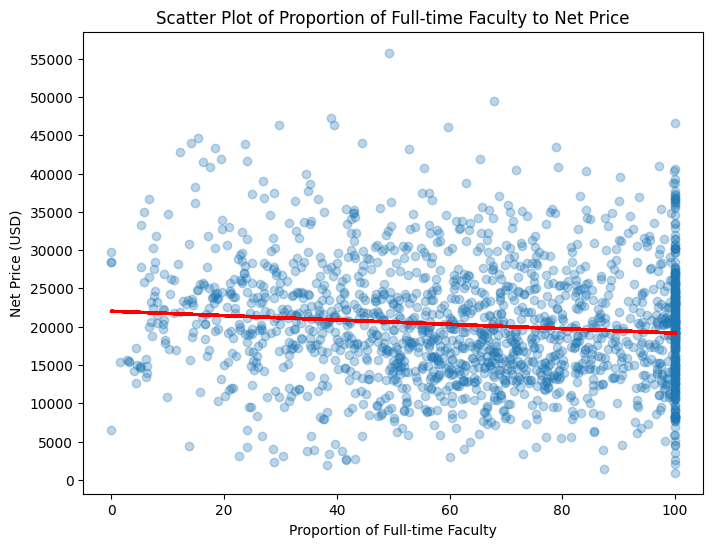

In [38]:
plt.figure(figsize=(8, 6))

plt.scatter(default_dataset['FullTimeFac'], default_dataset['NetPrice'], alpha=0.3)

# Line of best fit
filtered_data = default_dataset[['FullTimeFac', 'NetPrice']].dropna()
slope, intercept = np.polyfit(filtered_data['FullTimeFac'], filtered_data['NetPrice'], 1)
best_fit_line = slope * default_dataset['FullTimeFac'] + intercept
plt.plot(default_dataset['FullTimeFac'], best_fit_line, color='red', label='Line of Best Fit', linewidth=2)

plt.xlabel('Proportion of Full-time Faculty')
plt.ylabel('Net Price (USD)')
plt.title('Scatter Plot of Proportion of Full-time Faculty to Net Price')
plt.locator_params(axis='y', nbins=20)

# Display the plot
plt.show()

## How does the admission rate correlate with the median ACT and average SAT scores across different regions?

Now we calculate the correlation between the median ACT/average SAT scores and the admission rate.

In [39]:
corr_admitrate_medact = default_dataset['AdmitRate'].corr(default_dataset['MidACT'])
corr_admitrate_avgsat = default_dataset['AdmitRate'].corr(default_dataset['AvgSAT'])

print(f'Correlation between Admission Rate and Median ACT Scores: {corr_admitrate_medact:0.2f}')
print(f'Correlation between Admission Rate and Average SAT Scores: {corr_admitrate_avgsat:0.2f}')

Correlation between Admission Rate and Median ACT Scores: -0.42
Correlation between Admission Rate and Average SAT Scores: -0.42


The results show that both have the same moderate negative correlations with admission rate. It suggests that as the scores increase, the admission rate generally decreases. This may be because schools with lower admission rates only take in students with higher scores. Given that the scores are the same, it suggests that ACT and SAT scores have similar effects on admission rate and that colleges may target comparable minimum scores for both tests.

The below graphs show the admission rate plotted against both scores. They both show similar patterns, where a majority of the data seems to be clustered at higher admission rates. The data points on the left sides of the graphs appear to be less varied as well. This could be because fewer schools have selectively low admission rates. With most of the data being clustered on the right side, it suggests that the majority of schools have relatively good admission rates and that these schools admit a wider range of students.

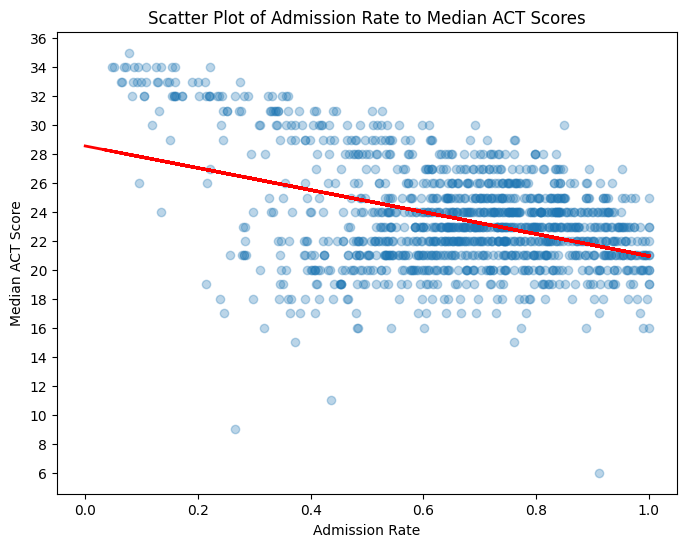

In [40]:
plt.figure(figsize=(8, 6))

plt.scatter(default_dataset['AdmitRate'], default_dataset['MidACT'], alpha=0.3)

# Line of best fit
filtered_data = default_dataset[['AdmitRate', 'MidACT']].dropna()
slope, intercept = np.polyfit(filtered_data['AdmitRate'], filtered_data['MidACT'], 1)
best_fit_line = slope * default_dataset['AdmitRate'] + intercept
plt.plot(default_dataset['AdmitRate'], best_fit_line, color='red', label='Line of Best Fit', linewidth=2)

plt.xlabel('Admission Rate')
plt.ylabel('Median ACT Score')
plt.title('Scatter Plot of Admission Rate to Median ACT Scores')
plt.locator_params(axis='y', nbins=16)

# Display the plot
plt.show()

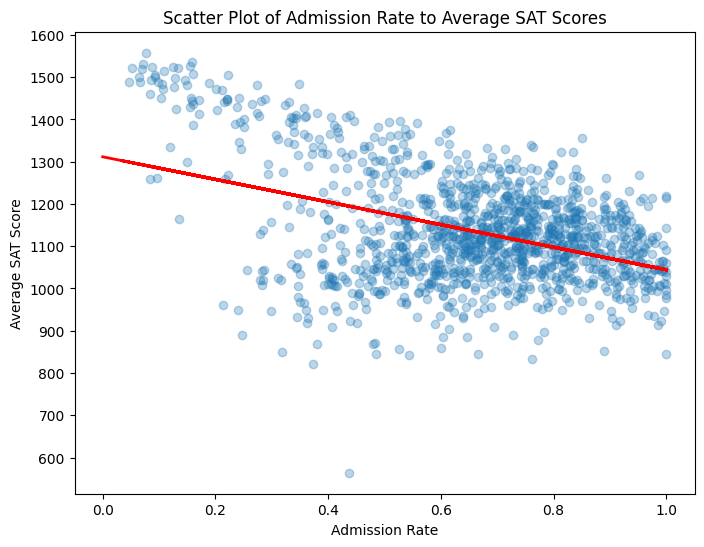

In [41]:
plt.figure(figsize=(8, 6))

plt.scatter(default_dataset['AdmitRate'], default_dataset['AvgSAT'], alpha=0.3)

# Line of best fit
filtered_data = default_dataset[['AdmitRate', 'AvgSAT']].dropna()
slope, intercept = np.polyfit(filtered_data['AdmitRate'], filtered_data['AvgSAT'], 1)
best_fit_line = slope * default_dataset['AdmitRate'] + intercept
plt.plot(default_dataset['AdmitRate'], best_fit_line, color='red', label='Line of Best Fit', linewidth=2)

plt.xlabel('Admission Rate')
plt.ylabel('Average SAT Score')
plt.title('Scatter Plot of Admission Rate to Average SAT Scores')
plt.locator_params(axis='y', nbins=16)

# Display the plot
plt.show()

# Conclusions

This report revealed a lot of interesting details about four-year colleges in the US. It was especially interesting that debt and tuition were not as heavily correlated as one might expect. The data suggests that they are actually negatively correlated, which is even more surprising. Overall, this report was a great opportunity to practice descriptive statistics, data analysis, and data manipulation/graphing in Python.

# References

Lock, R., Lock, P., Morgan, K., Lock, E., & Lock, D. (2020). *CollegeScores4yr* [Dataset]. https://www.lock5stat.com/datapage3e.html

Lock, R., Lock, P., Morgan, K., Lock, E., & Lock, D. (2020). *Dataset documentaton for the third edition of “Statistics: UnLocking the Power of Data.”* Wiley. https://www.lock5stat.com/datasets3e/Lock5DataGuide3e.pdf

OpenAI. (2024, November 4). College Data Analysis Questions, *ChatGPT* [Large language model]. https://chatgpt.com/share/6728fbf9-da6c-800c-a447-deaad40da6a3

# Appendix A

Given the following description of the data, propose 10 questions from diverse perspectives that can be addressed using the available data.

Description
Information on all US colleges and universities that primarily grant bachelor’s degrees, collected by
the Department of Education for the College Scoreboard
Format
A data frame with 2012 observations on the following 37 variables.
Name Name of the school
State State where school is located
ID ID number for school
Main Main campus? (1=yes, 0=branch campus)
Accred Accreditation agency
MainDegree Predominant undergrad degree (3=bachelors)
HighDegree Highest degree (0=no degrees, 1=certificate, 2=associate, 3=bachelors, 4= graduate)
Control Control of school (Private, Profit, Public)
Region Region of country (Midwest, Northeast, Southeast, Territory, West)
Locale Locale (City, Rural, Suburb, Town)
Latitude Latitude
Longitude Longitude
AdmitRate Admission rate
CommuteAtlanta 21
MidACT Median of ACT scores
AvgSAT Average combined SAT scores
Online Only online (distance) programs
Enrollment Undergraduate enrollment
White Percent of undergraduates who report being white
Black Percent of undergraduates who report being black
Hispanic Percent of undergraduates who report being Hispanic
Asian Percent of undergraduates who report being Asian
Other Percent of undergraduates who don’t report one of the above
PartTime Percent of undergraduates who are part-time students
NetPrice Average net price (cost minus aid)
Cost Average total cost for tuition, room, board, etc.
TuitionIn In-state tuition and fees
TuitonOut Out-of-state tuition and fees
TuitionFTE Net Tuition revenue per FTE student
InstructFTE Instructional spending per FTE student
FacSalary Average monthly salary for full-time faculty
FullTimeFac Percent of faculty that are full-time
Pell Percent of students receiving Pell grants
CompRate Completion rate (percent who finish program within 150% of normal time)
Debt Average debt for students who complete program
Female Percent of female students
FirstGen Percent of first-generation students
MedIncome Median family income (in $1,000)
